# Hypothesis testing and Experimental Design

## Introduction

Hypothesis testing is the comparing observations to an expected null (or uninteresting) hypothesis. If our observations are different than what we would expect from the null, we reject that null.

- Null hypothesis (H0): The parameter of interest is zero.
- Alternative hypothesis (HA): The parameter of interest is not zero.

<div class="alert alert-danger">We find evidence to reject the null, not accept the alternative (the possible alternatives are potentially infinite).</div>

## Example hypotheses

$H_0: \bar{y} = 0$

$H_A: \bar{y} \neq 0$

### Test statistics and null distribution

**Test statistics** are the values calculated from our observations to compare to the expected under the null.

The **null distribution** is the probability distribution of test statistics expected under the null

### Example null distribution

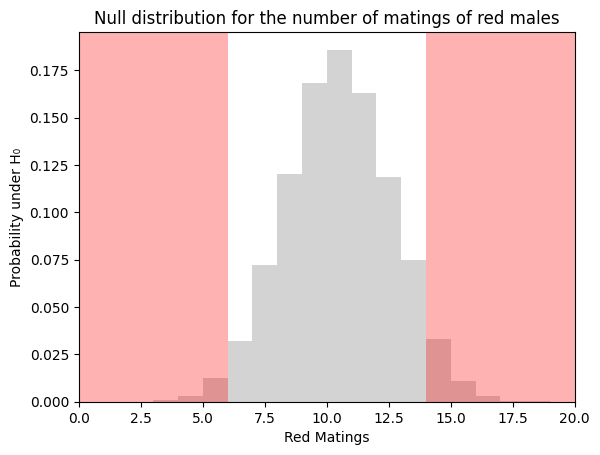

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

fish_tank = np.array(["red"] * 100 + ["pale"] * 100)
red_mating_null = []

for i in range(10000):
    x = np.random.choice(fish_tank, size=20, replace=False)
    y = np.sum(x == "red")
    red_mating_null.append(y)

# Calculate histogram, but do not draw it
h, bins = np.histogram(red_mating_null, bins=range(21), density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

plt.figure()
plt.bar(bin_centers, h, width=1, color="lightgray")
plt.xlabel("Red Matings")
plt.ylabel("Probability under H₀")
plt.title("Null distribution for the number of matings of red males")
plt.xlim(0, 20)

# Add shaded regions for 2.5% tails
cutoff = np.percentile(red_mating_null, [2.5, 97.5])
plt.axvspan(0, cutoff[0], facecolor='red', alpha=0.3)
plt.axvspan(cutoff[1], 20, facecolor='red', alpha=0.3)

plt.show()


### P-values
**P-value**: the probability of obtaining our results given that the null is true.

We can calculate the P-value here by taking the sum of the area under the curve of our null distribution where our results and any more extreme results fall (and where the opposite extremes fall, because it is two-tailed).

A one-tailed test would calculate P using only the left or right of the null distribution.

### Decision rule

When working with P-value, we typically use a standard significance value, or α = 0.05. Which means that we need to be 95% certain that our results are not due to random chance.

For the example above, P = 0.017, which is less than 0.05, therefore we reject the null that mating was random

### Errors

**Type I error**: rejecting a true null hypothesis. The probability of committing a Type I error = α.

**Type II error**: failing to reject a false null hypothesis. A test has more power if there is a lower likelihood of committing a Type II error.

### Experimental design

Types of studies:

- Clinical study: two or more treatments are assigned to human subjects
- Laboratory study: two or more treatments are assigned to non-human subjects
- Field study: two or more treatments are assigned to non-human subjects in nature.

### Why well planed experiments are important

- Bias is reduced
    - Assigning control groups
    - Treatments assigned at random
    - Blinding to reduce conscious and unconscious bias
Sampling error is reduced
    - Treatment can be replicated multiple times
    - Experimental units can be balanced (same number of units per treatment)
    - Treatment replicates can be blocked together, to reduce effects of environmental variation

<div class="alert alert-success">Sometimes, observational studies must be done in lieu of an experimental study. While there is less opportunity for randomization, all other features of an experiment can be used.</div>